## Preparing the tools

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [43]:
def set_seed(seed=4242):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
set_seed()

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# import data as panda's datafram
cinema_tickets_train_df = pd.read_csv("drive/My Drive/Cinema_tickets_dataset/cinemaTicket_Ref.csv")

In [46]:
cinema_tickets_train_df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [47]:
cinema_tickets_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


+ Convert all date data into appropriate date time format

In [48]:
cinema_tickets_train_df['date'] = pd.to_datetime(cinema_tickets_train_df.date)
cinema_tickets_train_df['month']= cinema_tickets_train_df.date.dt.month
cinema_tickets_train_df['week']=cinema_tickets_train_df.date.dt.week
cinema_tickets_train_df['day']=cinema_tickets_train_df.date.dt.day
cinema_tickets_train_df['quarter']=cinema_tickets_train_df.date.dt.quarter
cinema_tickets_train_df['weekDay'] =cinema_tickets_train_df.date.dt.weekday

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:
# Make a copy of the original DataFrame to perform edits on the copy
df_tmp = cinema_tickets_train_df.copy()

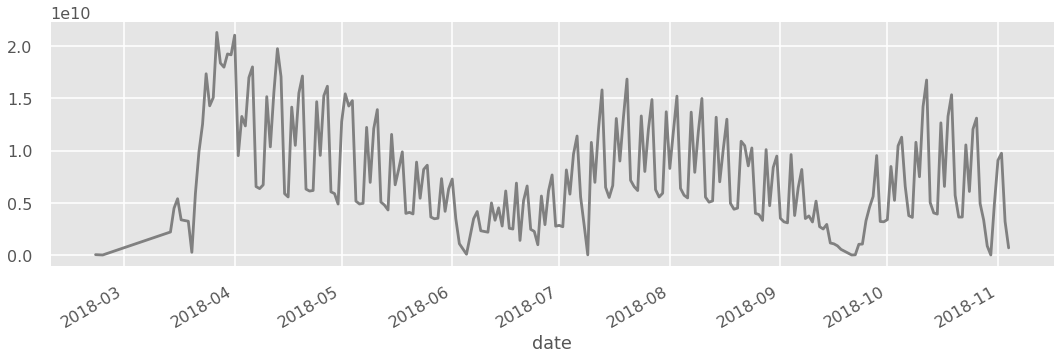

In [50]:
cinema_tickets_train_df.groupby('date')['total_sales'].sum().plot(figsize=(18, 5), color='grey');

###### Total sales per day by cinema

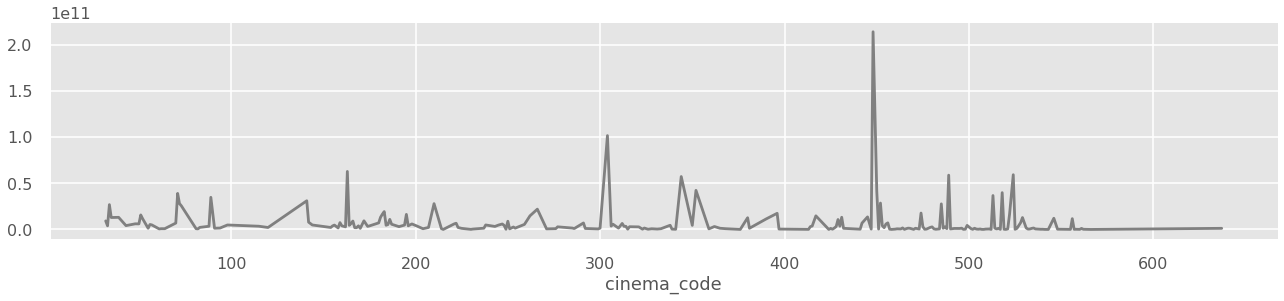

In [51]:
cinema_tickets_train_df.groupby('cinema_code')['total_sales'].sum().plot(figsize=(22, 4), color='grey');

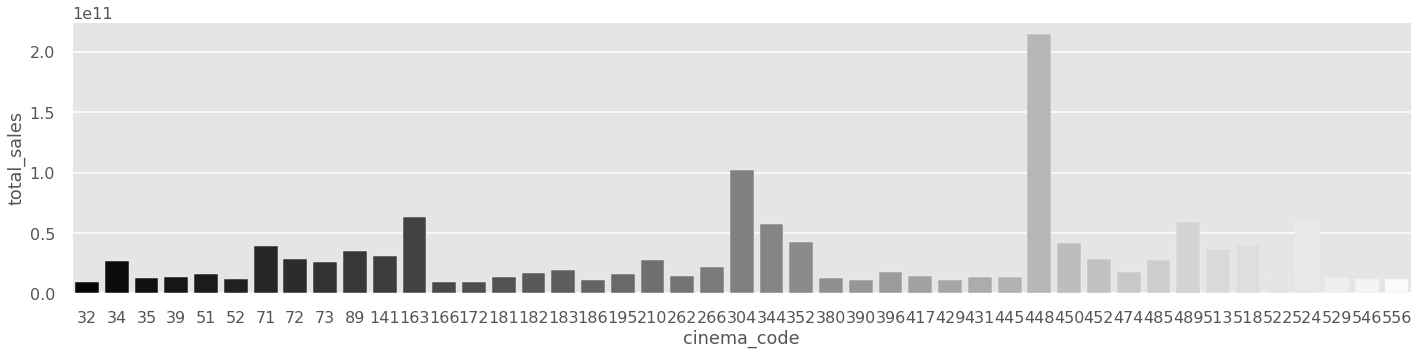

In [52]:
cg = df_tmp.groupby('cinema_code', as_index=False)['total_sales'].sum()
cg = cg[cg.total_sales > 9.000000e+09]
plt.figure(figsize=(24, 5))
sns.barplot(data=cg, x='cinema_code', y='total_sales', palette='gray')

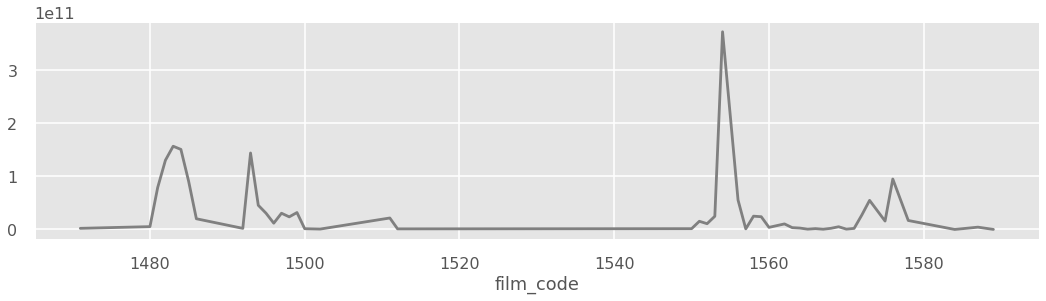

In [53]:
df_tmp.groupby('film_code')['total_sales'].sum().plot(figsize=(18, 4), color='grey')

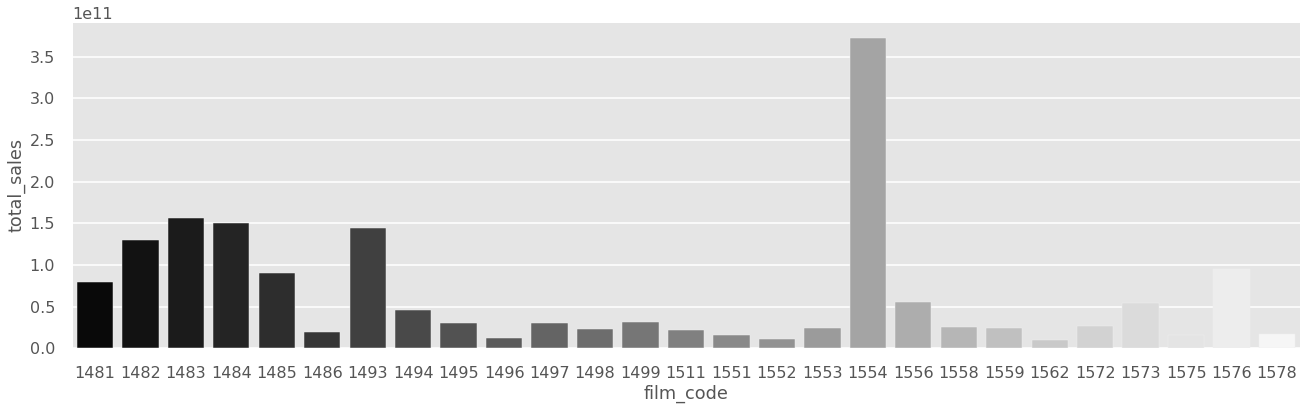

In [54]:
fg = df_tmp.groupby('film_code', as_index=False)['total_sales'].sum()
fg = fg[fg.total_sales > 9.000000e+09]
plt.figure(figsize=(22, 6))
sns.barplot(data=fg, x='film_code', y='total_sales', palette='gray')

In [55]:
df_tmp.head(7).T

,0,1,2,3,4,5,6
film_code,1492,1492,1492,1492,1492,1492,1492
cinema_code,304,352,489,429,524,71,163
total_sales,3900000,3360000,2560000,1200000,1200000,1050000,1020000
tickets_sold,26,42,32,12,15,7,10
tickets_out,0,0,0,0,0,0,0
show_time,4,5,4,1,3,3,3
occu_perc,4.26,8.08,20.0,11.01,16.67,0.98,7.69
ticket_price,150000.0,80000.0,80000.0,100000.0,80000.0,150000.0,102000.0
ticket_use,26,42,32,12,15,7,10
capacity,610.328638,519.80198,160.0,108.991826,89.982004,714.285714,130.039012


In [56]:
df_tmp.total_sales.describe()

count    1.425240e+05
mean     1.234728e+07
std      3.065486e+07
min      2.000000e+04
25%      1.260000e+06
50%      3.720000e+06
75%      1.110000e+07
max      1.262820e+09
Name: total_sales, dtype: float64

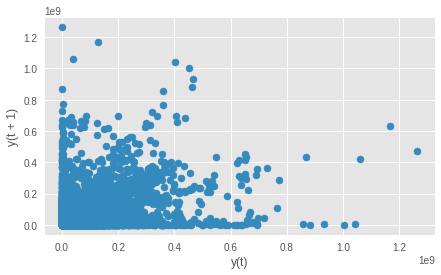

In [126]:
plt.style.use('ggplot')
plt.figure(figsize=(7, 4))
pd.plotting.lag_plot(df_tmp['total_sales'], lag=1)
plt.show()

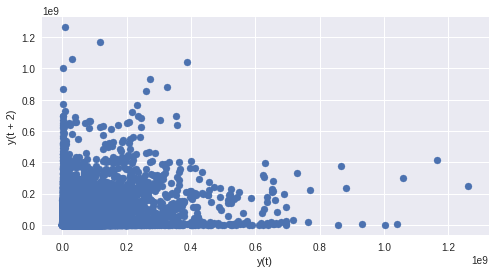

In [125]:
sns.set()
plt.style.use('seaborn')
plt.figure(figsize=(8, 4))
pd.plotting.lag_plot(df_tmp['total_sales'], lag=2)
plt.show()

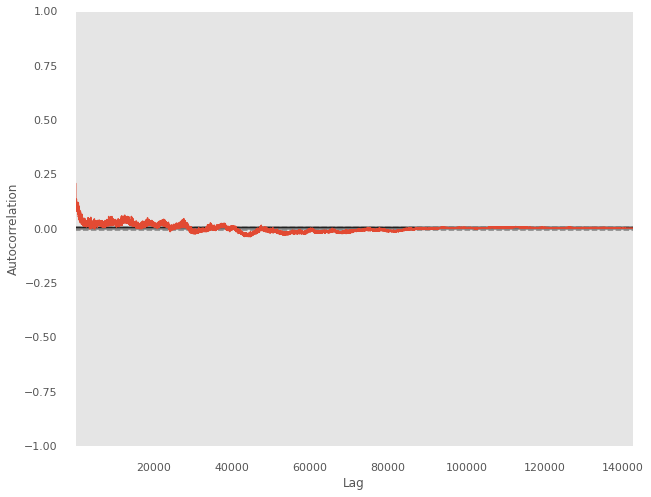

In [57]:
sns.set()
plt.style.use('ggplot')
plt.figure(figsize=(10, 8))
pd.plotting.autocorrelation_plot(df_tmp['total_sales']); 

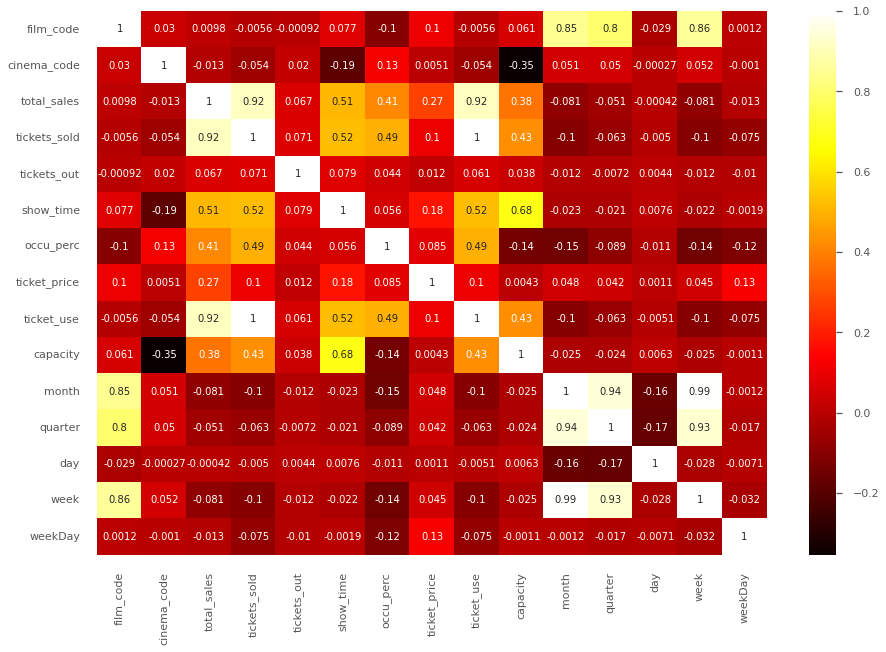

In [58]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_tmp.corr(), annot=True, cmap='hot');

In [59]:
del df_tmp['week']

In [60]:
df_tmp.sort_values(by=["date"], inplace=True, ascending=True)

###### Data imputing

+ Check missing values

In [61]:
df_tmp.isna().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
weekDay           0
dtype: int64

In [62]:
df_tmp.dropna(inplace = True)

In [63]:
x = df_tmp.groupby(['month','cinema_code'])['total_sales'].sum().rename('total_sales').reset_index()
x.sort_values(['month','cinema_code'], inplace = True)

+ Sort DataFrame in date order since we are working with a time series problem

###### Building rolling window and lag features

In [64]:
def build_lagandroll(df,target,  width = [2, 3]):
    for c in width:
        shifted = target.shift(c)
        df['lag_'+str(c)] = shifted
        window = target.rolling(window=c)
        dataframe = pd.concat([window.min(), window.mean(), window.max()], axis=1)
        dataframe.columns = ['roll'+str(c)+'_min', 'roll'+str(c)+'_mean', 'roll'+str(c)+'_max']
        df = pd.concat([df, dataframe], axis=1)
    return df

In [65]:
target = x.pop('total_sales')

df = build_lagandroll(x, target, width=[1, 2,3])
display(df.head(10))
df.shape, df.month.unique().size,

,month,cinema_code,lag_1,roll1_min,roll1_mean,roll1_max,lag_2,roll2_min,roll2_mean,roll2_max,lag_3,roll3_min,roll3_mean,roll3_max
0,2,448,NaN,3.203000e+07,3.203000e+07,3.203000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,518,3.203000e+07,1.800000e+05,1.800000e+05,1.800000e+05,NaN,1.800000e+05,1.610500e+07,3.203000e+07,NaN,NaN,NaN,NaN
2,3,32,1.800000e+05,7.682000e+08,7.682000e+08,7.682000e+08,3.203000e+07,1.800000e+05,3.841900e+08,7.682000e+08,NaN,1.800000e+05,2.668033e+08,7.682000e+08
3,3,33,7.682000e+08,2.010000e+08,2.010000e+08,2.010000e+08,1.800000e+05,2.010000e+08,4.846000e+08,7.682000e+08,3.203000e+07,1.800000e+05,3.231267e+08,7.682000e+08
4,3,34,2.010000e+08,3.672860e+09,3.672860e+09,3.672860e+09,7.682000e+08,2.010000e+08,1.936930e+09,3.672860e+09,1.800000e+05,2.010000e+08,1.547353e+09,3.672860e+09
5,3,35,3.672860e+09,1.866700e+09,1.866700e+09,1.866700e+09,2.010000e+08,1.866700e+09,2.769780e+09,3.672860e+09,7.682000e+08,2.010000e+08,1.913520e+09,3.672860e+09
6,3,39,1.866700e+09,1.554800e+09,1.554800e+09,1.554800e+09,3.672860e+09,1.554800e+09,1.710750e+09,1.866700e+09,2.010000e+08,1.554800e+09,2.364787e+09,3.672860e+09
7,3,43,1.554800e+09,5.412800e+08,5.412800e+08,5.412800e+08,1.866700e+09,5.412800e+08,1.048040e+09,1.554800e+09,3.672860e+09,5.412800e+08,1.320927e+09,1.866700e+09
8,3,48,5.412800e+08,8.739000e+08,8.739000e+08,8.739000e+08,1.554800e+09,5.412800e+08,7.075900e+08,8.739000e+08,1.866700e+09,5.412800e+08,9.899933e+08,1.554800e+09
9,3,50,8.739000e+08,6.224800e+08,6.224800e+08,6.224800e+08,5.412800e+08,6.224800e+08,7.481900e+08,8.739000e+08,1.554800e+09,5.412800e+08,6.792200e+08,8.739000e+08


((1983, 14), 10)

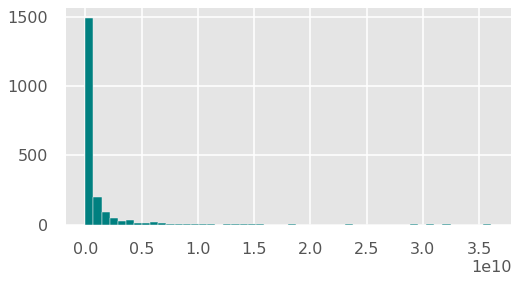

In [66]:
plt.style.use('seaborn-poster')
target.hist(figsize=(8, 4), bins=50, color='teal');

Saving and loading intermediate results

In [67]:
# Save preprocessed data
df_tmp.to_csv("drive/My Drive/Cinema_tickets_dataset/train_tmp.csv",
              index=False)

In [68]:
df_tmp = pd.read_csv("drive/My Drive/Cinema_tickets_dataset/train_tmp.csv",
                     low_memory=False)

Creating training and validation tests

In [102]:
df = pd.concat([df, target], axis=1)
train = df.copy()
x_train = train[train.month <= 10]
y_train = train[train.month <= 10].pop('total_sales')

val = df.copy()
x_val =  val[val.month >10 ]
y_val = val[val.month >10 ].pop('total_sales')

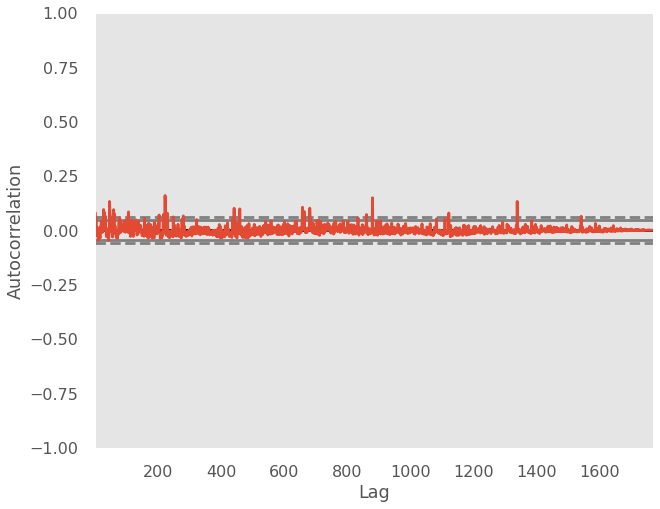

In [103]:
plt.figure(figsize=(10, 8))
pd.plotting.autocorrelation_plot(y_train) 

In [104]:
x_train.drop('month', axis=1, inplace=True)
x_val.drop('month', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [105]:
x_train.head()

,cinema_code,lag_1,roll1_min,roll1_mean,roll1_max,lag_2,roll2_min,roll2_mean,roll2_max,lag_3,roll3_min,roll3_mean,roll3_max,total_sales,total_sales,total_sales,total_sales,total_sales
0,448,NaN,3.203000e+07,3.203000e+07,3.203000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32030000,32030000,32030000,32030000,32030000
1,518,32030000.0,1.800000e+05,1.800000e+05,1.800000e+05,NaN,180000.0,1.610500e+07,3.203000e+07,NaN,NaN,NaN,NaN,180000,180000,180000,180000,180000
2,32,180000.0,7.682000e+08,7.682000e+08,7.682000e+08,32030000.0,180000.0,3.841900e+08,7.682000e+08,NaN,180000.0,2.668033e+08,7.682000e+08,768200000,768200000,768200000,768200000,768200000
3,33,768200000.0,2.010000e+08,2.010000e+08,2.010000e+08,180000.0,201000000.0,4.846000e+08,7.682000e+08,32030000.0,180000.0,3.231267e+08,7.682000e+08,201000000,201000000,201000000,201000000,201000000
4,34,201000000.0,3.672860e+09,3.672860e+09,3.672860e+09,768200000.0,201000000.0,1.936930e+09,3.672860e+09,180000.0,201000000.0,1.547353e+09,3.672860e+09,3672860000,3672860000,3672860000,3672860000,3672860000


In [106]:
x_train.isna().sum()

cinema_code    0
lag_1          1
roll1_min      0
roll1_mean     0
roll1_max      0
lag_2          2
roll2_min      1
roll2_mean     1
roll2_max      1
lag_3          3
roll3_min      2
roll3_mean     2
roll3_max      2
total_sales    0
total_sales    0
total_sales    0
total_sales    0
total_sales    0
dtype: int64

In [107]:
# Fill numeric rows with the mean
for label, content in x_train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Fill missing numeric values with the mean
            x_train[label] = content.fillna(content.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [109]:
x_val.isna().sum()

cinema_code    0
lag_1          0
roll1_min      0
roll1_mean     0
roll1_max      0
lag_2          0
roll2_min      0
roll2_mean     0
roll2_max      0
lag_3          0
roll3_min      0
roll3_mean     0
roll3_max      0
total_sales    0
total_sales    0
total_sales    0
total_sales    0
total_sales    0
dtype: int64

## Models training

Linear Regression

In [110]:
x_train.shape

(1771, 18)

In [113]:
# To remove duplicate columns
y_train = y_train.loc[:,~y_train.columns.duplicated()].copy()
y_val = y_val.loc[:,~y_val.columns.duplicated()].copy()

In [115]:
y_train.head()

,total_sales
0,32030000
1,180000
2,768200000
3,201000000
4,3672860000


In [116]:
y_val.head()

,total_sales
1771,84540000
1772,56280000
1773,271620000
1774,207600000
1775,109920000


Models

In [79]:
# Put models in a dictionary
models = {"Linear Regression": LinearRegression(),
          "Logistic Regression": LogisticRegression() 
          }

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_val : validation data
    y_train : labels assosciated with training data
    y_test : labels assosciated with validation data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [119]:
model_scores = fit_and_score(models,x_train,x_val,y_train,y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [120]:
model_scores

{'Linear Regression': 1.0, 'Logistic Regression': 0.0}